In [2]:
!pip install geopandas folium contextily --quiet

In [12]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import time

In [13]:
df = pd.read_csv("/kaggle/input/datathon2025/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [26]:
nbrhd = df["Neighborhood"].unique().tolist()
nbrhd

['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']

In [15]:
# geolocator = Nominatim(user_agent="geo_analysis")

In [16]:
# def get_lat_lon(neighborhood, city="Ames, Iowa"):
#     location = geolocator.geocode(f"{neighborhood}, {city}")
#     if location:
#         return location.latitude, location.longitude

In [30]:
neighborhood_coords = {
    "CollgCr": (42.0228, -93.6455),
    "Veenker": (42.0401, -93.6575),
    "Crawfor": (42.0250, -93.6318),
    "NoRidge": (42.0656, -93.6570),
    "Mitchel": (42.0510, -93.6268),
    "Somerst": (42.0560, -93.6330),
    "NWAmes": (42.0517, -93.6602),
    "OldTown": (42.0301, -93.6150),
    "BrkSide": (42.0308, -93.6237),
    "Sawyer": (42.0250, -93.6750),
    "NridgHt": (42.0609, -93.6690),
    "NAmes": (42.0464, -93.6335),
    "SawyerW": (42.0238, -93.6855),
    "IDOTRR": (42.0126, -93.6247),
    "MeadowV": (41.9986, -93.6250),
    "Edwards": (42.0180, -93.6515),
    "Timber": (42.0351, -93.6759),
    "Gilbert": (42.1056, -93.6433),
    "StoneBr": (42.0618, -93.6281),
    "ClearCr": (42.0704, -93.6781),
    "NPkVill": (42.0455, -93.6560),
    "Blmngtn": (42.0621, -93.6394),
    "BrDale": (42.0210, -93.6283),
    "SWISU": (42.0167, -93.6502),
    "Blueste": (42.0326, -93.6510),
}

In [31]:
df["latitude"] = df["Neighborhood"].map(lambda x: neighborhood_coords.get(x, (None, None))[0])
df["longitude"] = df["Neighborhood"].map(lambda x: neighborhood_coords.get(x, (None, None))[1])

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

print(gdf[["Neighborhood", "latitude", "longitude"]].head())

  Neighborhood  latitude  longitude
0      CollgCr   42.0228   -93.6455
1      Veenker   42.0401   -93.6575
2      CollgCr   42.0228   -93.6455
3      Crawfor   42.0250   -93.6318
4      NoRidge   42.0656   -93.6570


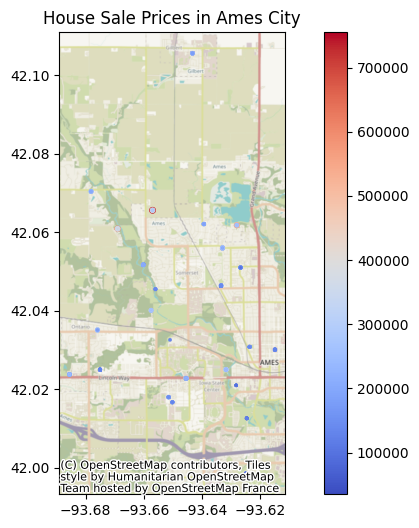

In [32]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, column="SalePrice", cmap="coolwarm", legend=True, markersize=gdf["SalePrice"]/50000, alpha=0.6)
ctx.add_basemap(ax, crs=gdf.crs)  # Add basemap
ax.set_title("House Sale Prices in Ames City")
plt.show()


In [33]:
import folium
from folium.plugins import HeatMap

# Ensure no missing values for mapping
df = df.dropna(subset=["latitude", "longitude", "SalePrice"])

# Create a base map centered around Ames, Iowa
m = folium.Map(location=[42.03, -93.65], zoom_start=12)

# Convert data into a format suitable for a heatmap (latitude, longitude, price intensity)
heat_data = list(zip(df["latitude"], df["longitude"], df["SalePrice"]))

# Add HeatMap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Save the interactive map as an HTML file (optional)
m.save("Ames_House_Prices_Heatmap.html")

# Display the map
m
